In [1]:


#imports
import os
import glob
import pandas as pd
import random
import numpy as np
from datetime import datetime
import csv
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import subprocess

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns




import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier

C:\Users\MMscichowski\.conda\envs\metis\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
REdata = pd.read_csv("data\censusdata.csv",delimiter=',') 
# Preview the first 5 lines of the loaded data 
REdata.head()

,Zip Code,2016 Old Median,COLUMN 1,COLUMN 2,COLUMN 3,COLUMN 4,COLUMN 5,COLUMN 6,COLUMN 7,COLUMN 8,...,COLUMN 215,COLUMN 216,COLUMN 217,COLUMN 218,COLUMN 219,COLUMN 220,COLUMN 221,COLUMN 222,COLUMN 223,COLUMN 224
0,10001,1637500.0,21038,14899,0.708,14899,0.708,13870,0.659,1029,...,0.175,0.397,0.397,0.000,0.493,0.148,0.152,0.127,0.179,0.172
1,10002,1130000.0,68324,38156,0.558,38110,0.558,34748,0.509,3362,...,0.278,0.369,0.368,0.345,0.376,0.263,0.246,0.330,0.269,0.299
2,10003,1825000.0,53455,35932,0.672,35925,0.672,33932,0.635,1993,...,0.099,0.047,0.047,0.023,0.072,0.103,0.097,0.138,0.030,0.149
3,10004,1167500.0,2610,2220,0.851,2220,0.851,2075,0.795,145,...,0.048,0.096,0.009,0.000,0.012,0.040,0.041,0.018,0.005,0.096
4,10005,1385000.0,7896,6993,0.886,6988,0.885,6745,0.854,243,...,0.121,0.000,0.000,0.000,0.000,0.133,0.136,0.000,0.003,0.207


In [3]:
RE_features = ['COLUMN 1','COLUMN 2','COLUMN 3','COLUMN 4','COLUMN 5','COLUMN 6','COLUMN 7','COLUMN 8','COLUMN 9','COLUMN 10','COLUMN 11','COLUMN 12','COLUMN 13','COLUMN 14','COLUMN 15','COLUMN 16','COLUMN 17','COLUMN 18','COLUMN 19','COLUMN 20','COLUMN 21','COLUMN 22','COLUMN 23','COLUMN 24','COLUMN 25','COLUMN 26','COLUMN 27','COLUMN 28','COLUMN 29','COLUMN 30','COLUMN 31','COLUMN 32','COLUMN 33','COLUMN 34','COLUMN 35','COLUMN 36','COLUMN 37','COLUMN 38','COLUMN 39','COLUMN 40','COLUMN 41','COLUMN 42','COLUMN 43','COLUMN 44','COLUMN 45','COLUMN 46','COLUMN 47','COLUMN 48','COLUMN 49','COLUMN 50','COLUMN 51','COLUMN 52','COLUMN 53','COLUMN 54','COLUMN 55','COLUMN 56','COLUMN 57','COLUMN 58','COLUMN 59','COLUMN 60','COLUMN 61','COLUMN 62','COLUMN 63','COLUMN 64','COLUMN 65','COLUMN 66','COLUMN 67','COLUMN 68','COLUMN 69','COLUMN 70','COLUMN 71','COLUMN 72','COLUMN 73','COLUMN 74','COLUMN 75','COLUMN 76','COLUMN 77','COLUMN 78','COLUMN 79','COLUMN 80','COLUMN 81','COLUMN 82','COLUMN 83','COLUMN 84','COLUMN 85','COLUMN 86','COLUMN 87','COLUMN 88','COLUMN 89','COLUMN 90','COLUMN 91','COLUMN 92','COLUMN 93','COLUMN 94','COLUMN 95','COLUMN 96','COLUMN 97','COLUMN 98','COLUMN 99','COLUMN 100','COLUMN 101','COLUMN 102','COLUMN 103','COLUMN 104','COLUMN 105','COLUMN 106','COLUMN 107','COLUMN 108','COLUMN 109','COLUMN 110','COLUMN 111','COLUMN 112','COLUMN 113','COLUMN 114','COLUMN 115','COLUMN 116','COLUMN 117','COLUMN 118','COLUMN 119','COLUMN 120','COLUMN 121','COLUMN 122','COLUMN 123','COLUMN 124','COLUMN 125','COLUMN 126','COLUMN 127','COLUMN 128','COLUMN 129','COLUMN 130','COLUMN 131','COLUMN 132','COLUMN 133','COLUMN 134','COLUMN 135','COLUMN 136','COLUMN 137','COLUMN 138','COLUMN 139','COLUMN 140','COLUMN 141','COLUMN 142','COLUMN 143','COLUMN 144','COLUMN 145','COLUMN 146','COLUMN 147','COLUMN 148','COLUMN 149','COLUMN 150','COLUMN 151','COLUMN 152','COLUMN 153','COLUMN 154','COLUMN 155','COLUMN 156','COLUMN 157','COLUMN 158','COLUMN 159','COLUMN 160','COLUMN 161','COLUMN 162','COLUMN 163','COLUMN 164','COLUMN 165','COLUMN 166','COLUMN 167','COLUMN 168','COLUMN 169','COLUMN 170','COLUMN 171','COLUMN 172','COLUMN 173','COLUMN 174','COLUMN 175','COLUMN 176','COLUMN 177','COLUMN 178','COLUMN 179','COLUMN 180','COLUMN 181','COLUMN 182','COLUMN 183','COLUMN 184','COLUMN 185','COLUMN 186','COLUMN 187','COLUMN 188','COLUMN 189','COLUMN 190','COLUMN 191','COLUMN 192','COLUMN 193','COLUMN 194','COLUMN 195','COLUMN 196','COLUMN 197','COLUMN 198','COLUMN 199','COLUMN 200','COLUMN 201','COLUMN 202','COLUMN 203','COLUMN 204','COLUMN 205','COLUMN 206','COLUMN 207','COLUMN 208','COLUMN 209','COLUMN 210','COLUMN 211','COLUMN 212','COLUMN 213','COLUMN 214','COLUMN 215','COLUMN 216','COLUMN 217','COLUMN 218','COLUMN 219','COLUMN 220','COLUMN 221','COLUMN 222','COLUMN 223','COLUMN 224']
RE_target = ['2016 Old Median']


In [4]:
X = StandardScaler().fit_transform(REdata[RE_features].astype(float))
y = REdata[RE_target]

lr = LinearRegression()

#must take absolute value because sklearn makes the errors negative - dont ask me why
mean_squared_errors = np.abs(cross_val_score(lr,X,y,cv=44,scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("44-fold mean RMSE: ", np.mean(root_mean_squared_errors))

44-fold mean RMSE:  868537.9632583596


In [5]:
coeffs = LinearRegression().fit(X,y).coef_
coeff_df = pd.DataFrame(list(zip(RE_features,np.abs(coeffs))),columns=["features","betas"])
coeff_df.sort_values("betas",ascending=False,inplace=True)
coeff_df

,features,betas
0,COLUMN 1,"[7979.776162443683, 11778.459528933938, 66811...."


In [6]:
pca = PCA()
transformed_pca_x = pca.fit_transform(REdata[RE_features])
#create component indices
component_names = ["component_"+str(comp) for comp in range(1, len(pca.explained_variance_)+1)]

#generate new component dataframe
transformed_pca_x = pd.DataFrame(transformed_pca_x,columns=component_names)
print(REdata[RE_features].head())
transformed_pca_x.head()

   COLUMN 1  COLUMN 2  COLUMN 3  COLUMN 4  COLUMN 5  COLUMN 6  COLUMN 7  \
0     21038     14899     0.708     14899     0.708     13870     0.659   
1     68324     38156     0.558     38110     0.558     34748     0.509   
2     53455     35932     0.672     35925     0.672     33932     0.635   
3      2610      2220     0.851      2220     0.851      2075     0.795   
4      7896      6993     0.886      6988     0.885      6745     0.854   

   COLUMN 8  COLUMN 9  COLUMN 10  ...  COLUMN 215  COLUMN 216  COLUMN 217  \
0      1029     0.049          0  ...       0.175       0.397       0.397   
1      3362     0.049         46  ...       0.278       0.369       0.368   
2      1993     0.037          7  ...       0.099       0.047       0.047   
3       145     0.056          0  ...       0.048       0.096       0.009   
4       243     0.031          5  ...       0.121       0.000       0.000   

   COLUMN 218  COLUMN 219  COLUMN 220  COLUMN 221  COLUMN 222  COLUMN 223  \
0       0

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_35,component_36,component_37,component_38,component_39,component_40,component_41,component_42,component_43,component_44
0,10515.397355,53462.765155,-13960.517937,12664.949596,24041.609272,-8288.492830,10891.852285,-20752.284163,-2024.872966,6514.347152,...,92.276712,-257.799990,-54.692226,171.129129,186.171436,15.442309,-243.062303,-118.856984,2.734911,1.508899e-11
1,-240812.077109,-12718.463368,74554.904655,11496.175304,16121.702644,-5590.819227,6541.444550,6972.679994,3324.269972,19048.218454,...,-128.373168,-101.495274,-43.412278,-11.248272,103.799591,79.852315,79.605492,-23.465953,34.019135,1.508899e-11
2,75140.747011,-76367.482684,44197.581698,3397.874358,9022.195470,812.724596,-1142.326402,-4712.327844,-10590.652593,-7527.903278,...,86.658768,-142.621121,-326.232372,-42.650564,-41.045757,122.853156,-39.760791,-98.114290,98.130917,1.508899e-11
3,117477.796547,-15869.815339,-119941.444336,-21035.651311,-478.529968,-17063.264909,-18978.087094,22884.847807,10355.371815,3578.379694,...,71.590759,72.312852,-152.518841,-60.482457,27.029663,114.616999,-109.968859,381.742389,149.838347,1.508899e-11
4,150869.717813,-16608.625594,-90960.598048,-8441.710504,4972.626885,-2781.556242,21433.845425,27811.334623,-7188.080286,-11620.309452,...,-80.123928,79.666343,232.914825,-170.962001,33.700616,-8.922575,23.404416,-194.996542,-177.181492,1.508899e-11


In [7]:
component_matrix = pd.DataFrame(pca.components_,index=component_names,columns = RE_features)
#add additional columns to describe what
component_matrix["explained_variance_ratio"] = pca.explained_variance_ratio_
component_matrix["eigenvalue"] = pca.explained_variance_
figure = sns.mpl.pyplot.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

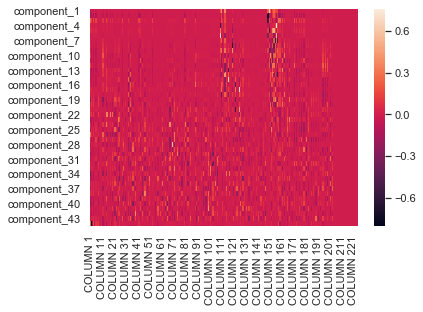

In [8]:
figure.add_subplot(131)
sns.heatmap(component_matrix.iloc[:,:-2])

Text(0, 0.5, 'variance explained')

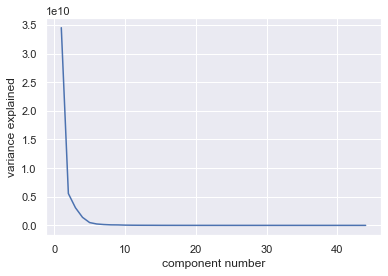

In [9]:
figure.add_subplot(132)
sns.mpl.pyplot.plot(range(1,component_matrix.shape[0]+1), component_matrix.eigenvalue)
sns.mpl.pyplot.xlabel("component number")
sns.mpl.pyplot.ylabel("variance explained")

#### component_matrix.explained_variance_ratio.cumsum()

In [18]:
mean_squared_errors = np.abs(cross_val_score(lr,transformed_pca_x.iloc[:,:2],y,cv=5,scoring='neg_mean_squared_error'))
#apply square root to each fold
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("44-fold mean RMSE: ", np.mean(root_mean_squared_errors))
print("44-fold std RMSE: ", np.std(root_mean_squared_errors))

44-fold mean RMSE:  588993.5333034436
44-fold std RMSE:  301132.436648768
